<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Churn Modelling Using ANN</strong></p>

In [1]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
!pip install python-dp

     |████████████████████████████████| 3.5 MB 22.6 MB/s 


In [4]:
!pip install cn.protect

ERROR: Could not find a version that satisfies the requirement cn.protect (from versions: none)
ERROR: No matching distribution found for cn.protect


In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong> Basic Exploratory Data Analysis (EDA)</strong></p> 

In [8]:
# checking for null values

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

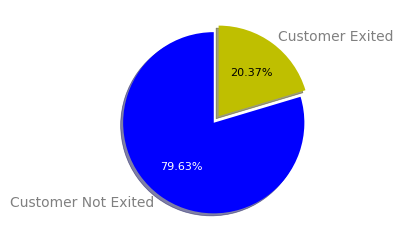

In [11]:
values = df.Exited.value_counts()
labels = ['Customer Not Exited', 'Customer Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode, colors = ["b", "y"])

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>20% of our customers have been churned and 80% haven't been churned.</strong></p> 

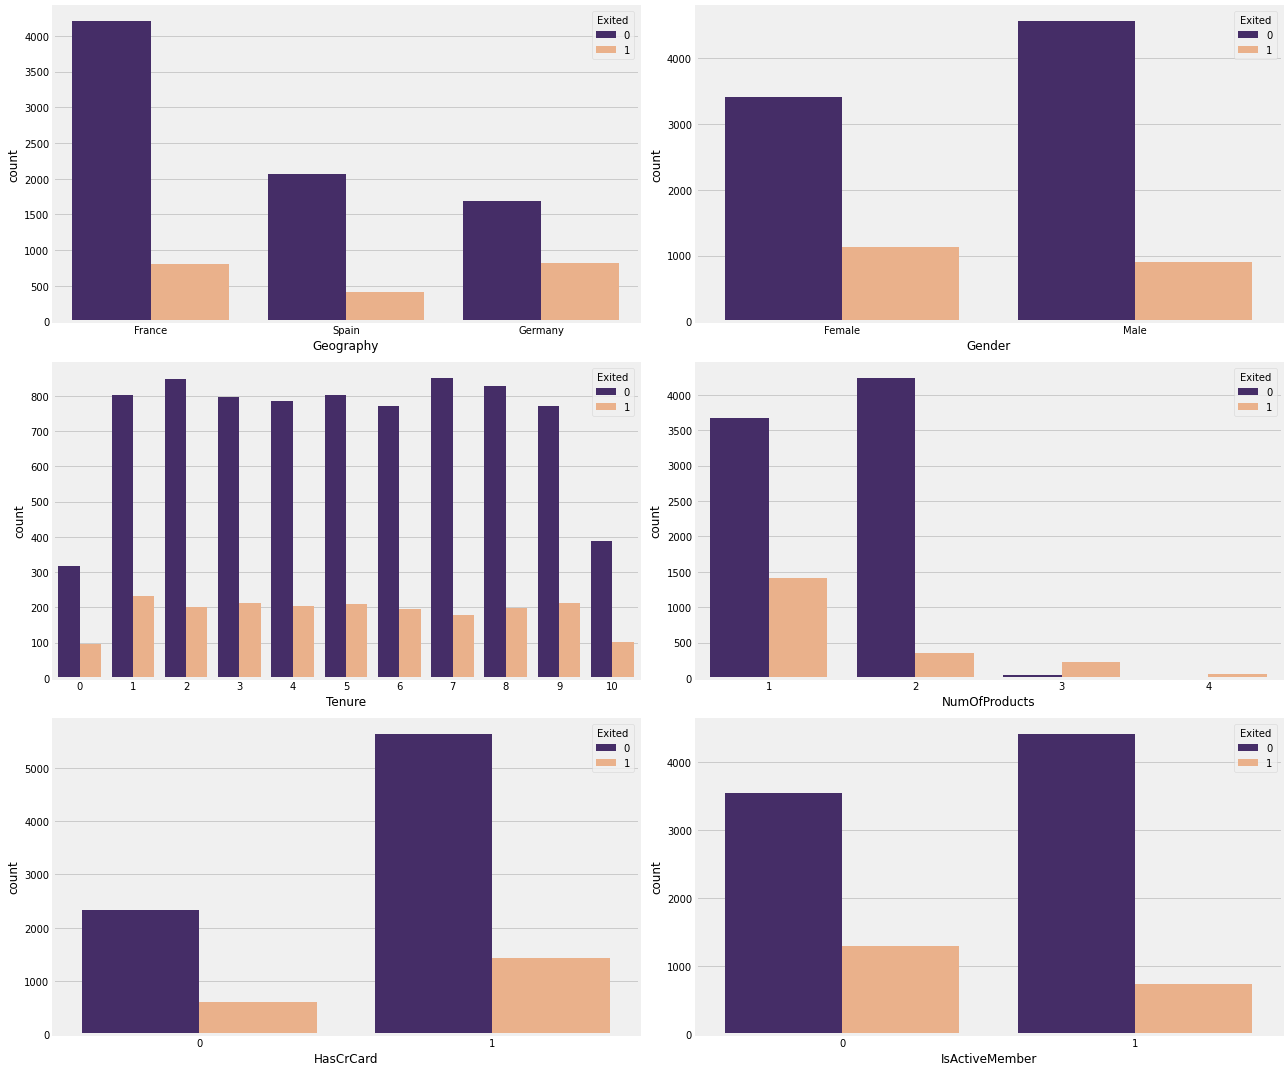

In [17]:
# visualizing categorical variables

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0], palette=['#432371',"#FAAE7B"])
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1], palette=['#432371',"#FAAE7B"])
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0], palette=['#432371',"#FAAE7B"])
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1], palette=['#432371',"#FAAE7B"])
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0], palette=['#432371',"#FAAE7B"])
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1], palette=['#432371',"#FAAE7B"])

plt.tight_layout()
plt.show()

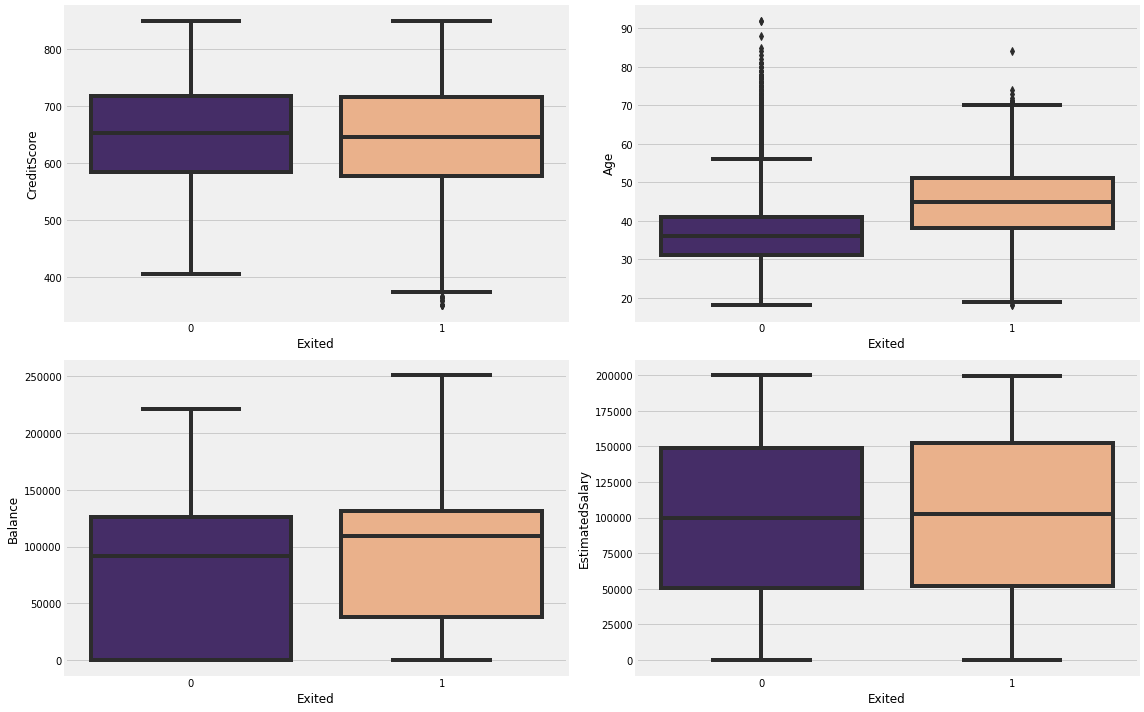

In [19]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0], palette=['#432371',"#FAAE7B"])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1], palette=['#432371',"#FAAE7B"])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0], palette=['#432371',"#FAAE7B"])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1], palette=['#432371',"#FAAE7B"])

plt.tight_layout()
plt.show()

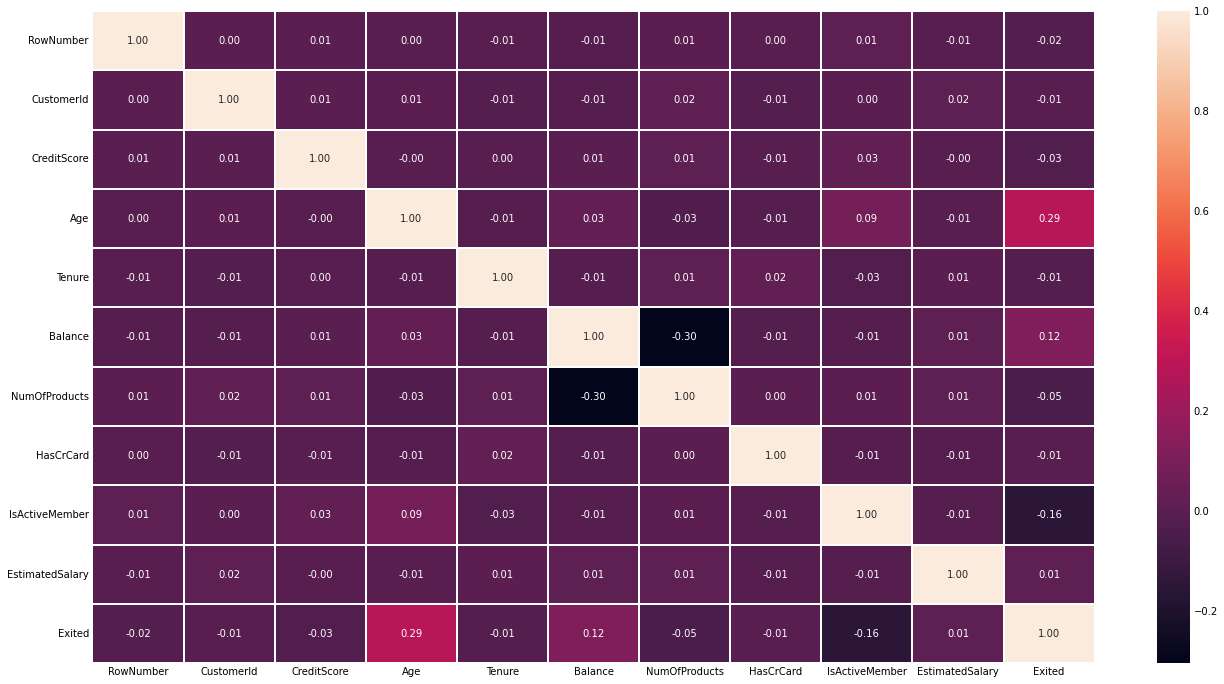

In [ ]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Since there is no high correlation between any 2 features, we can assume that there is no multicolinearity present in data.</strong></p> 